# Generate view embeddings

In [60]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

settings = "200dim_100epoch_0.08learn_1000cc_"
dim = 200

def normalize(embed):
    m, n = embed.shape
    for i in xrange(m):
        embed[i] = embed[i] / np.linalg.norm(embed[i])
    return embed

with open(settings + "vectors.txt", 'r') as glove:
    words = []
    lines = glove.readlines()
    embed = np.zeros((len(lines) - 1, dim))
    body = lines[:-1]
    i = 0
    for vec in body:
        tokens = vec.split()
        words.append(tokens[0])
        embed[i] = np.asarray([float(x) for x in tokens[1:]])
        i = i + 1
        
word_dict = {words[i] : i for i in xrange(len(words))}
        
eembed = np.copy(embed)
embed = normalize(embed)
with open(settings + "cellvectors.txt", 'r') as cov:
    lines = cov.readlines()
    cembed = np.zeros((len(lines) - 1, dim))
    body = lines[:-1]
    i = 0
    for vec in body:
        tokens = vec.split()
        cembed[i] = np.asarray([abs(float(x)) for x in tokens[1:]])
        i = i + 1
ccembed = np.copy(cembed)
ncembed = normalize(cembed)
with open(settings + "timevectors.txt", 'r') as cov2:
    lines = cov2.readlines()
    tembed = np.zeros((len(lines) - 1, dim))
    body = lines[:-1]
    i = 0
    for vec in body:
        tokens = vec.split()
        tembed[i] = np.asarray([abs(float(x)) for x in tokens[1:]])
        i = i + 1
ttembed = np.copy(tembed)
ntembed = normalize(tembed)

In [58]:
subs = ["Conservative", "NeutralPolitics", "PoliticalDiscussion", "SandersForPresident", "The_Donald", "politics"]

for i in xrange(len(ncembed)):
    comp = subs
    dists = []
    for j in xrange(len(ncembed)):
        dists.append(np.linalg.norm(ncembed[i] - ncembed[j]))
    dists, comp = zip(*sorted(zip(dists, comp)))
    print subs[i], comp, dists

Conservative ('Conservative', 'PoliticalDiscussion', 'politics', 'The_Donald', 'NeutralPolitics', 'SandersForPresident') (0.0, 0.53197210816980334, 0.54335642518291472, 0.5630954301295793, 0.6335192837254725, 0.65813507189810072)
NeutralPolitics ('NeutralPolitics', 'Conservative', 'PoliticalDiscussion', 'politics', 'SandersForPresident', 'The_Donald') (0.0, 0.6335192837254725, 0.71893930328275357, 0.73886292456428682, 0.75050259457588953, 0.84341884841404802)
PoliticalDiscussion ('PoliticalDiscussion', 'politics', 'SandersForPresident', 'Conservative', 'The_Donald', 'NeutralPolitics') (0.0, 0.36093406640060904, 0.51953944936516983, 0.53197210816980334, 0.68532142843168464, 0.71893930328275357)
SandersForPresident ('SandersForPresident', 'politics', 'PoliticalDiscussion', 'Conservative', 'The_Donald', 'NeutralPolitics') (0.0, 0.47604472656017133, 0.51953944936516983, 0.65813507189810072, 0.74040017327329055, 0.75050259457588953)
The_Donald ('The_Donald', 'Conservative', 'politics', 'Pol

In [4]:
times = range(1, 13)

for i in xrange(len(ntembed)):
    comp = times
    dists = []
    for j in xrange(len(ntembed)):
        dists.append(np.linalg.norm(ntembed[i] - ntembed[j]))
    dists, comp = zip(*sorted(zip(dists, comp)))
    print times[i], comp, dists

1 (1, 2, 4, 3, 6, 7, 12, 8, 9, 10, 5, 11) (0.0, 0.33015109414303201, 0.49975910115341005, 0.50364044860621571, 0.52401900208161245, 0.5660987128647248, 0.59452912057081264, 0.59626781432167431, 0.61481317850425743, 0.61610240309770603, 0.62658420760845057, 0.65454668357957591)
2 (2, 1, 4, 3, 6, 7, 12, 8, 9, 10, 5, 11) (0.0, 0.33015109414303201, 0.42995249443811639, 0.44250902174071671, 0.47769669797401509, 0.48513065350001805, 0.50747874162186046, 0.52151107021487042, 0.53249829894229606, 0.54198085406369223, 0.56347690782901816, 0.58013627217611552)
3 (3, 4, 2, 6, 7, 5, 1, 9, 8, 12, 10, 11) (0.0, 0.41496371423924805, 0.44250902174071671, 0.48925072339617209, 0.50121219842242004, 0.50271275209721455, 0.50364044860621571, 0.55466793408409232, 0.56866431349504387, 0.57213656898628074, 0.58027175436794531, 0.61562254392372895)
4 (4, 6, 3, 5, 2, 8, 7, 12, 1, 9, 10, 11) (0.0, 0.40448610690556286, 0.41496371423924805, 0.42949411157730089, 0.42995249443811639, 0.47292005838575946, 0.486742272

In [23]:
sub_embed = {}
for k in xrange(len(subs)):
    m, n = embed.shape
    sub_specific_embed = np.zeros((m, n))
    for i in xrange(m):
        sub_specific_embed[i] = np.multiply(embed[i], ccembed[k])
    sub_embed[subs[k]] = normalize(sub_specific_embed)
    
time_embed = {}
for k in xrange(len(times)):
    m, n = embed.shape
    time_specific_embed = np.zeros((m, n))
    for i in xrange(m):
        time_specific_embed[i] = np.multiply(embed[i], ttembed[k])
    time_embed[times[k]] = normalize(time_specific_embed)
    
sub_time_embed = {}
for sub in xrange(len(subs)):
    for time in xrange(len(times)):
        m, n = embed.shape
        sub_time_specific_embed = np.zeros((m, n))
        for i in xrange(m):
            sub_time_specific_embed[i] = np.multiply(np.multiply(embed[i], ttembed[time]), ccembed[sub])
        sub_time_embed[(subs[sub], times[time])] = normalize(sub_time_specific_embed)

In [66]:
[np.linalg.norm(ccembed[i]) for i in xrange(len(ccembed))]

[4.6701483891081201,
 4.0367553961274663,
 5.105795030837835,
 5.2251820854723299,
 5.6669383457753826,
 5.2152796262855281]

In [67]:
subs

['Conservative',
 'NeutralPolitics',
 'PoliticalDiscussion',
 'SandersForPresident',
 'The_Donald',
 'politics']

In [11]:
ste_12_dict = {words[i] : sub_time_embed[("Conservative", 2)][i] for i in xrange(len(words))}
pickle.dump(ste_11_dict, open("../embeddings/word-embeddings-benchmarks/test_view_2.p", 'wb'))

# Save view vectors

In [6]:
sub_time_vectors = {}
for sub in xrange(len(subs)):
    for time in xrange(len(times)):
        sub_time_vectors[(subs[sub], times[time])] = np.multiply(ttembed[time], ccembed[sub])

(array([ 46.,  19.,  50.,  73.,   8.,   2.,   0.,   1.,   0.,   1.]),
 array([ 0.        ,  0.02495448,  0.04990896,  0.07486344,  0.09981792,
         0.12477241,  0.14972689,  0.17468137,  0.19963585,  0.22459033,
         0.24954481]),
 <a list of 10 Patch objects>)

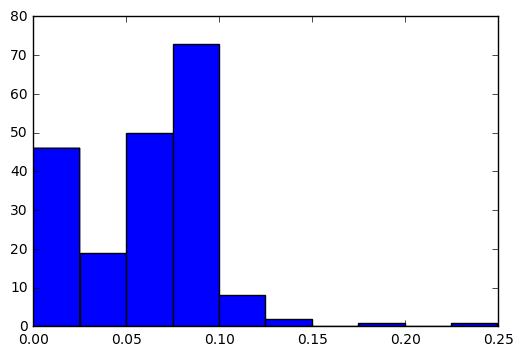

In [57]:
plt.hist(np.abs(ttembed[0]))

In [8]:
a, b = zip(*sorted(zip(np.abs(sub_time_vectors[("politics", 9)]), range(200))))

In [12]:
for word in 

[(16, 0.023479137967198183),
 (71, 0.021985447602095958),
 (87, 0.019792142064350697),
 (95, 0.015820274755309376),
 (141, 0.014883866355797),
 (153, 0.013423166281702854),
 (189, 0.011284725480022965),
 (89, 0.010539451310750764),
 (138, 0.0091436138282805744),
 (56, 0.0091316467858019949),
 (193, 0.0088431596778621464),
 (70, 0.0083212231560627591),
 (129, 0.0082540064161588586),
 (53, 0.007506161559036488),
 (113, 0.0073009615294025382),
 (125, 0.0072922041543670964),
 (69, 0.0072077195072100253),
 (19, 0.0071363701506776218),
 (157, 0.0071067015233141941),
 (127, 0.0070633829593038568),
 (46, 0.0069780321991639383),
 (118, 0.0069765758129499839),
 (140, 0.0068630153341605622),
 (142, 0.0068123273158138134),
 (136, 0.0067780018071926075),
 (29, 0.0066738016903498641),
 (174, 0.0066217608531829349),
 (9, 0.0065599297090257304),
 (135, 0.0065516535457466954),
 (79, 0.0065264232623538166),
 (0, 0.0065083171756179555),
 (168, 0.0064988527651800325),
 (34, 0.0064760638879956898),
 (130, 

In [13]:
words, importances = word_dict.keys(), []
for word in words:
    important_vec = np.asarray([embed[word_dict[word]][141], embed[word_dict[word]][95], embed[word_dict[word]][87], embed[word_dict[word]][71], embed[word_dict[word]][16]])
    importances.append(np.linalg.norm(important_vec))
importances, words = zip(*sorted(zip(importances, words)))

In [14]:
words[::-1][:100]

('the',
 '\xd0\xaf',
 'and',
 'to',
 'that',
 'voatco',
 'a',
 'of',
 'delaware',
 'materially',
 'is',
 'it',
 'conclusive',
 'regimes',
 'in',
 'nina',
 'disturbed',
 '\xd0\xb2',
 'unifying',
 '950',
 'but',
 'for',
 'leslie',
 'he',
 'sameday',
 'i',
 'foe',
 'yorker',
 'greasemonkey',
 'trump',
 'they',
 'catered',
 'daniels',
 'convinces',
 'advantageous',
 'clapping',
 'merchandise',
 'rosie',
 '\xf0\x9f\x92\xaf',
 'subredditmessagecomposetorthedonald',
 'antichrist',
 'caucuss',
 'useraposs',
 'watchdog',
 'actually',
 '\xf0\x9f\x91\x80',
 'hijack',
 'you',
 'gifted',
 'shaken',
 'circulation',
 'assuredly',
 'so',
 'impunity',
 'minors',
 'walsh',
 'vendetta',
 'disrupting',
 'him',
 'corp',
 'favourite',
 '111',
 'circulated',
 'resting',
 'slipping',
 'wellliked',
 '\xd1\x8d\xd1\x82\xd0\xbe',
 'swamp',
 'economical',
 'hotline',
 'altitude',
 'consolidating',
 'hintuse',
 'carlson',
 'them',
 'ifif',
 'reluctantly',
 'devious1087',
 'not',
 'odonnell',
 '\xd1\x8f',
 'undoing'

(0.065451332327336229, 0.26650745892123695)

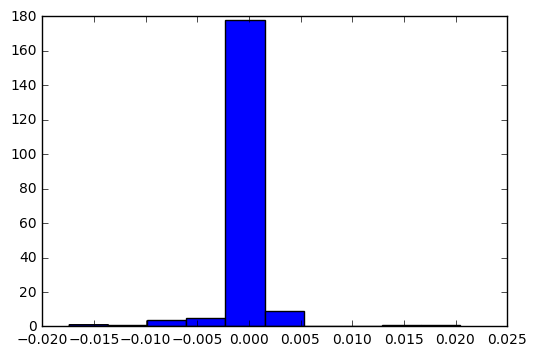

In [102]:
plt.hist(np.abs(sub_time_vectors[("politics", 9)]) - np.abs(sub_time_vectors[("politics", 3)]))
np.ndarray.tolist(ncembed[0]).index(max(ncembed[0]))
np.ndarray.tolist(ncembed[3]).index(max(ncembed[3]))
ncembed[5][138], ncembed[3][138]

In [15]:
a, b = zip(*sorted(zip(np.abs(sub_time_vectors[("politics", 9)]) - np.abs(sub_time_vectors[("politics", 3)]), range(200))))

In [16]:
zip(a, b)

[(-0.017383613145868688, 150),
 (-0.01020420865886078, 49),
 (-0.0070433267492853958, 120),
 (-0.0069605714750638689, 197),
 (-0.0065235661744418912, 183),
 (-0.0061285283466760978, 173),
 (-0.0034582261793995994, 141),
 (-0.0033967671322575367, 111),
 (-0.0031938737168708872, 21),
 (-0.0030648175739461068, 18),
 (-0.0023898672475771571, 2),
 (-0.001548607259595569, 80),
 (-0.0013602101665861951, 61),
 (-0.0010848609490818478, 87),
 (-0.0006634940349143373, 44),
 (-0.00032195919301514046, 103),
 (-0.00028568430893983424, 5),
 (-0.00023999419466429802, 182),
 (-0.00020735759820199057, 163),
 (-0.00019600511882939594, 134),
 (-0.00014824735773764745, 155),
 (-0.00010891488197118347, 149),
 (-0.00010726071079792277, 186),
 (-9.3522076393515174e-05, 178),
 (-5.1331442338336045e-05, 3),
 (-4.9882004817611812e-05, 23),
 (-4.8156126582266957e-05, 97),
 (-2.6020444702476962e-05, 124),
 (-4.9652819169646034e-06, 127),
 (-1.4210826614364375e-06, 11),
 (-1.9881197023219514e-12, 15),
 (-1.22633400

In [20]:
words, importances = word_dict.keys(), []
for word in words:
    important_vec = np.asarray([embed[word_dict[word]][150], embed[word_dict[word]][49]])
    importances.append(np.linalg.norm(important_vec))
importances, words = zip(*sorted(zip(importances, words)))

In [21]:
words[::-1][:50]

('mcmullin',
 'matthews',
 'bloomberg',
 'israel',
 'manafort',
 'pepe',
 'bounce',
 'banc',
 'plagiarism',
 'corporations',
 'melania',
 'jobs',
 'perjury',
 'nevada',
 'mole',
 'pneumonia',
 'cunt',
 'wives',
 'khan',
 'ducks',
 '3d',
 'shelters',
 'bump',
 'tiffany',
 'panama',
 'meta',
 'pussy',
 'the',
 'accusers',
 'companies',
 'obamacare',
 'civilian',
 'tribune',
 'military',
 'company',
 'and',
 'tyranny',
 'cuba',
 '\xc2\xa7',
 'superdelegates',
 'that',
 'shitredditsays',
 'to',
 'bernie',
 '\xf0\x9f\x98\x82',
 'mfw',
 'of',
 'vegas',
 '\xe2\x80\xa2',
 'ec')

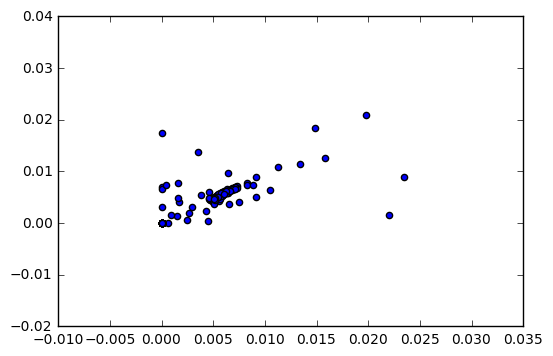

In [103]:
plt.scatter(sub_time_vectors[("politics", 9)], sub_time_vectors[("politics", 3)])

# Sparsity in vectors

In [64]:
view_vector = np.multiply(ccembed[5], ttembed[8])

In [61]:
indices, view_vector = view_vector, indices

In [69]:
indices[-10:]

(56, 138, 89, 189, 153, 141, 95, 87, 71, 16)

In [98]:
words, importances = word_dict.keys(), []
for word in words:
    important_vec = np.asarray([embed[word_dict[word]][141], embed[word_dict[word]][95], embed[word_dict[word]][87], embed[word_dict[word]][71], embed[word_dict[word]][16]])
    importances.append(np.linalg.norm(important_vec))
importances, words = zip(*sorted(zip(importances, words)))

In [101]:
words[-100:]

('impotent',
 'clinton',
 'anal',
 'communicating',
 'nay',
 'miraculously',
 'its',
 'tissue',
 'lightyears',
 'his',
 'doxing',
 'manchester',
 'fringes',
 'copypaste',
 'llc',
 '4way',
 'foothold',
 'malpractice',
 'undoing',
 '\xd1\x8f',
 'odonnell',
 'not',
 'devious1087',
 'reluctantly',
 'ifif',
 'them',
 'carlson',
 'hintuse',
 'consolidating',
 'altitude',
 'hotline',
 'economical',
 'swamp',
 '\xd1\x8d\xd1\x82\xd0\xbe',
 'wellliked',
 'slipping',
 'resting',
 'circulated',
 '111',
 'favourite',
 'corp',
 'him',
 'disrupting',
 'vendetta',
 'walsh',
 'minors',
 'impunity',
 'so',
 'assuredly',
 'circulation',
 'shaken',
 'gifted',
 'you',
 'hijack',
 '\xf0\x9f\x91\x80',
 'actually',
 'watchdog',
 'useraposs',
 'caucuss',
 'antichrist',
 'subredditmessagecomposetorthedonald',
 '\xf0\x9f\x92\xaf',
 'rosie',
 'merchandise',
 'clapping',
 'advantageous',
 'convinces',
 'daniels',
 'catered',
 'they',
 'trump',
 'greasemonkey',
 'yorker',
 'foe',
 'i',
 'sameday',
 'he',
 'leslie',

# Cosine similarity analogies (view)

In [39]:
# Find closest word by cosine similarity to: word1 : word2 :: word3 : ???, i.e. word2 + word3 - word1
# w is words, wd is word_dict
def cosine_analogies(embed, w, wd, word1, word2, word3, thresh):
    match = embed[wd[word2]] - embed[wd[word1]]
    norm1 = np.linalg.norm(match)
    tries, dists = [], []
    for i in xrange(len(embed)):
        tries.append(w[i])
        against = embed[wd[word3]] - embed[wd[w[i]]]
        norm2 = np.linalg.norm(against)
        if norm2 < thresh:
            dists.append(np.dot(against, match) / (np.linalg.norm(against) * np.linalg.norm(match)))
        else:
            dists.append(0.0)
    dists, tries = zip(*sorted(zip(dists, tries)))
    return tries

def cosine_axis_analogies(embed, w, wd, word1, word2, thresh):
    match = embed[wd[word2]] - embed[wd[word1]]
    norm1 = np.linalg.norm(match)
    tries, dists = [], []
    for i in xrange(len(embed)):
        for j in xrange(i):
            against = embed[i] - embed[j]
            norm2 = np.linalg.norm(against)
            if norm2 < thresh:
                dists.append(np.dot(against, match) / (np.linalg.norm(against) * np.linalg.norm(match)))
                tries.append((w[i], w[j]))
    dists, tries = zip(*sorted(zip(dists, tries)))
    return tries

In [51]:
view = sub_time_embed[("politics", 10)]
closest = cosine_analogies(view, words, word_dict, "hillary", "trump", "democrat", 1.5)

/Users/kjtian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


In [52]:
closest[:100]

('club',
 'donald',
 'christian',
 'chicago',
 'golf',
 'redpilled',
 'hotel',
 'family',
 'voter',
 'leader',
 'hitler',
 'sometimes',
 'opposition',
 'hed',
 'anime',
 'sunday',
 'nazi',
 'territory',
 'eric',
 'party',
 'phony',
 'leaders',
 'pageant',
 'hat',
 'colorado',
 'ids',
 '\xd0\xaf',
 'ryan',
 'watching',
 'mcconnell',
 'says',
 'equipment',
 'patriotism',
 'sidelines',
 'start',
 'manage',
 'among',
 'measure',
 'crowd',
 'leave',
 'display',
 'picks',
 'mate',
 'corps',
 'onto',
 'govern',
 'call',
 'casino',
 '2015',
 'london',
 'besides',
 'die',
 'face',
 'fix',
 'lucky',
 'kellyanne',
 'ideas',
 'nice',
 'households',
 'freeze',
 'running',
 'gonna',
 'intimidation',
 'bank',
 '2014',
 'although',
 'degenerate',
 'slew',
 'senator',
 'hispanics',
 'little',
 'blocking',
 'enforce',
 'help',
 'babies',
 'thinking',
 'kelly',
 'angeles',
 'proud',
 'monkey',
 'targets',
 'criminals',
 'clown',
 'admissions',
 '\xd0\xbd\xd0\xbe',
 'suffer',
 'politically',
 'especially'

In [91]:
closest = cosine_axis_analogies(view, words, word_dict, "hillary", "trump", 1.5)
print "done"

KeyboardInterrupt: 

In [96]:
closest[:40]

('donald',
 'supporters',
 'presidency',
 'golf',
 'putin',
 'anti',
 'trumps',
 'melania',
 'defeat',
 'rallies',
 'cruz',
 'hotel',
 'ignore',
 'official',
 'hes',
 'sen',
 'ca',
 'vs',
 'master',
 'tv',
 'saying',
 'race',
 'candidacy',
 'pennsylvania',
 'crowd',
 'ct',
 'west',
 'nationalism',
 'banking',
 '39',
 'returns',
 'jesus',
 'release',
 'democratic',
 'stupidity',
 'next',
 'given',
 'hope',
 'start',
 'shocking')

# View analogies

In [7]:
# Find closest word to: word1 : word2 :: word3 : ???, i.e. word2 + word3 - word1

def analogies(embed, w, wd, word1, word2, word3):
    match = embed[wd[word2]] + embed[wd[word3]] - embed[wd[word1]]
    tries, dists = [], []
    for i in xrange(len(embed)):
        tries.append(w[i])
        dists.append(np.linalg.norm(embed[i] - match))
    dists, tries = zip(*sorted(zip(dists, tries)))
    return tries, dists

In [8]:
view = sub_time_embed[("Conservative", 2)]

In [12]:
a, b = analogies(view, words, word_dict, "corrupt", "corrupt", "good")[:40]
b[:200]

(6.9302981126338724e-17,
 0.72458286593061516,
 0.79704641469603965,
 0.79837186683052297,
 0.80654739492260563,
 0.81776146084137324,
 0.82888535867593938,
 0.84361212313786982,
 0.84612041546162198,
 0.85862778000799922,
 0.86753199412894377,
 0.86845774255812702,
 0.86924095429009529,
 0.87962218935555825,
 0.88231539314177598,
 0.88350247224069156,
 0.89650001248580702,
 0.90192736633438741,
 0.90247833153979351,
 0.90911320714610888,
 0.91211595387852973,
 0.9186940913854903,
 0.92254983258940493,
 0.92683849725384815,
 0.93229381946624523,
 0.94243162991212159,
 0.94333766659982454,
 0.946950870299618,
 0.95055793025763535,
 0.95080538532302472,
 0.95527868413094519,
 0.95614340457664349,
 0.95847475736663934,
 0.96311926580768914,
 0.96337407628052218,
 0.96429725314024661,
 0.9647521018803058,
 0.96760739787729599,
 0.9680597340748397,
 0.96838717200349911,
 0.9711773761302217,
 0.97155599588971231,
 0.9722802482496391,
 0.97329880982151251,
 0.97433040626946277,
 0.97520187283

In [63]:
# Sub analogies

def sub_analogies(embed, cembed, w, wd, s, word1, sub1, sub2):
    match = embed[wd[word1]] + cembed[s.index(sub2)] - cembed[s.index(sub1)]
    tries, dists = [], []
    for i in xrange(len(embed)):
        tries.append(w[i])
        dists.append(np.linalg.norm(embed[i] - match))
    dists, tries = zip(*sorted(zip(dists, tries)))
    return tries

In [65]:
sub_analogies(view, ccembed, words, word_dict, subs, "hillary", "The_Donald", "politics")[:40]

('hillary',
 'clinton',
 'bernie',
 'sanders',
 'crooked',
 'hilary',
 'trump',
 'caucuss',
 'she',
 'her',
 'vote',
 'supporters',
 'support',
 'hrc',
 'clintons',
 'for',
 'wins',
 'supporting',
 'against',
 'voting',
 'raper',
 'foundation',
 'still',
 'hillarys',
 'him',
 'actually',
 'and',
 'he',
 'supporter',
 'while',
 'said',
 'but',
 'has',
 'samille',
 'because',
 'shes',
 'bill',
 'that',
 'campaign',
 'will')

# Word drift over time

How much do a pair of words drift in a subreddit over time?

In [35]:
def graph(ste, wd, word1, word2, sub):
    dists = [np.linalg.norm(ste[(sub, t)][wd[word1]] - ste[(sub, t)][wd[word2]]) for t in xrange(1, 13)]
    plt.plot(range(1, 13), dists)

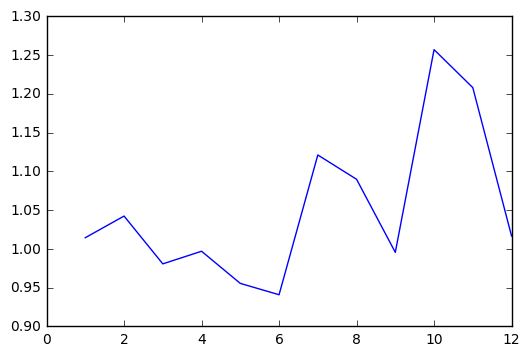

In [38]:
graph(sub_time_embed, word_dict, "hillary", "corrupt", "SandersForPresident")

# Words that get closer in a view

In [24]:
def drift(gen_embed, view_embed, w, wd, word):
    # words that drift most towards word relative to general embedding
    sort_words, sort_ranges = w, []
    for i in xrange(len(w)):
        shift = np.linalg.norm(view_embed[i] - view_embed[wd[word]]) - np.linalg.norm(gen_embed[i] - gen_embed[wd[word]])
        sort_ranges.append(shift)
    sort_ranges, sort_words = zip(*sorted(zip(sort_ranges, sort_words)))
    return sort_words

In [33]:
v = sub_time_embed[("politics", 3)]

In [34]:
drift(embed, v, words, word_dict, "hillary")[:40]

('invent',
 'brietbart',
 'database',
 'conflict',
 'gangs',
 'serial',
 'judaism',
 'usher',
 'sends',
 'lords',
 'carters',
 'incriminating',
 'depths',
 'timeframe',
 'grey',
 'conflicted',
 'otherwise',
 'editing',
 'undoing',
 'judging',
 'mcdonald',
 'entertained',
 'standardized',
 'indictments',
 'attendees',
 'dared',
 'collapsing',
 'latch',
 'homelessness',
 'talk',
 'afghan',
 'weve',
 'spectacular',
 'gabbard',
 'pressures',
 'slave',
 'arriving',
 'shared',
 'disproven',
 'exclusive')

# Analogies

In [14]:
# Find closest word to: word1 : word2 :: word3 : ???, i.e. word2 + word3 - word1

def analogies(embed, w, wd, word1, word2, word3):
    match = wd[word2] + wd[word3] - wd[word1]
    tries, dists = [], []
    for i in xrange(len(embed)):
        tries.append(w[i])
        dists.append(np.linalg.norm(embed[i] - match))
    dists, tries = zip(*sorted(zip(dists, tries)))
    return tries

In [17]:
word_dict = {words[i] : i for i in xrange(len(words))}

analogies(embed, words, word_dict, 'man', 'woman', 'king').index('queen')

34008

In [11]:
ste_11['man'] - ste_11['woman'] + ste_11['queen']

array([ -4.57227508e-03,   2.94195528e-02,   1.85489261e-11,
        -9.25595782e-02,   6.53394183e-08,   1.35268365e-04,
         2.72982354e-02,   4.55041593e-03,   1.84738139e-01,
        -6.30881706e-02,   0.00000000e+00,   1.48024681e-01,
        -7.16825034e-02,   3.49351064e-02,  -9.00192676e-02,
         7.80678139e-02,   1.57402569e-01,  -4.19143611e-05,
         1.25285522e-01,   2.82096914e-01,   3.20407460e-02,
        -2.92064512e-06,  -5.71066590e-01,   8.67382593e-02,
         3.22219844e-01,  -1.17708800e-03,  -6.48299979e-02,
        -7.80406864e-07,  -4.84522428e-02,   1.93121253e-03,
        -2.12126648e-01,  -2.99644859e-02,  -2.03224822e-01,
        -1.19822344e-01,   7.32977315e-02,  -5.91506424e-02,
         4.02628133e-30,  -2.15642747e-01,   1.10858730e-01,
        -3.68731216e-01,   1.10274690e-01,  -9.08733654e-02,
         9.35337314e-02,  -3.84803631e-21,  -1.47087674e-04,
        -6.97826324e-02,   9.15459197e-02,   1.69285101e-10,
         7.62424328e-02,

In [13]:
ste['man'] - ste['woman'] + ste['queen']

array([-0.0347427 , -0.00171878,  0.08036382, -0.0756645 ,  0.01953578,
        0.07473946,  0.02534833, -0.01969689,  0.18820401, -0.05950474,
        0.18231041,  0.15940334, -0.07021447,  0.02927301, -0.07237009,
        0.09611204,  0.16480103, -0.05941342,  0.08049711,  0.3139643 ,
        0.01357394, -0.05741534, -0.23787589,  0.09397853,  0.31914995,
       -0.16879351, -0.04742181, -0.15832292, -0.08666043,  0.10100044,
       -0.21160811, -0.02920867, -0.23656886, -0.1407993 ,  0.06129395,
       -0.05261317,  0.07598447, -0.17372784,  0.07723228, -0.19855253,
        0.13331695, -0.09252968,  0.10766796, -0.10218712, -0.01195821,
       -0.09075358,  0.06087349,  0.2538105 ,  0.08534385,  0.07965839,
        0.18725081, -0.0519432 , -0.22704811, -0.07242161,  0.32501585,
       -0.06682245,  0.11730906,  0.06550153, -0.1690172 , -0.11791538,
        0.00436498,  0.04876921,  0.13695879,  0.14504921, -0.07488604,
       -0.00189326, -0.04364401,  0.02538492,  0.06836515, -0.07

In [5]:
def most_drift(sub1, sub2, w):
    wp = w
    m, n = embed.shape
    sub1_embed = sub_embed[sub1]
    sub2_embed = sub_embed[sub2]
    drifts = [np.linalg.norm(np.asarray([np.linalg.norm(sub1_embed[i] - sub1_embed[j]) for j in xrange(1000)]) - np.asarray([np.linalg.norm(sub2_embed[i] - sub2_embed[j]) for j in xrange(1000)])) for i in xrange(1000)]
    drifts, wp = zip(*sorted(zip(drifts, wp)))
    return drifts, wp
            

In [27]:
a, b = most_drift("politics", "The_Donald", words)

In [5]:
def sub_task(embed, sub_embed, words, subs, check):
    # find pairs of words which are pushed together in a particular sub
    sub_squeeze = {}
    for k in xrange(len(subs)):
        print k
        sembed = sub_embed[subs[k]]
        sort_pairs, sort_ranges = [], []
        for i in xrange(len(check)):
            for j in xrange(i):
                sort_pairs.append((words[check[i]], words[check[j]]))
                shift = np.linalg.norm(sembed[check[i]] - sembed[check[j]]) - np.linalg.norm(embed[check[i]] - embed[check[j]])
                sort_ranges.append(shift)
        sort_ranges, sort_pairs = zip(*sorted(zip(sort_ranges, sort_pairs)))
        sub_squeeze[subs[k]] = (sort_ranges, sort_pairs)
    return sub_squeeze

In [11]:
a = sub_task(embed, sub_embed, words, subs, common_indices)

0
1
2
3
4
5


In [6]:
import pickle
common_words = pickle.load(open("common_words.p", 'rb'))

In [10]:
word_dict = {words[i] : i for i in xrange(len(words))}
common_indices = [word_dict[word] for word in common_words[:2000]]

In [18]:
trump_push = a["The_Donald"][1][::-1]
sanders_push = a["SandersForPresident"][1][::-1]
politics_push = a["politics"][1][::-1]

In [15]:
trump_push[:40]

(('biden', 'reagan'),
 ('comey', 'generally'),
 ('smaller', 'afford'),
 ('obamacare', 'buying'),
 ('buying', 'mass'),
 ('11', 'protest'),
 ('wealthy', 'mass'),
 ('arms', '90'),
 ('starts', 'meaning'),
 ('efforts', 'definitely'),
 ('aids', 'rpolitics'),
 ('independents', 'generally'),
 ('protest', 'door'),
 ('crisis', 'anybody'),
 ('african', 'bernies'),
 ('slightly', 'failed'),
 ('campaigns', 'stopped'),
 ('yep', 'sweden'),
 ('picked', 'signs'),
 ('warren', 'reagan'),
 ('b', 'afford'),
 ('transcripts', 'isis'),
 ('smaller', 'plus'),
 ('carson', 'rpolitics'),
 ('obamacare', 'heavily'),
 ('protest', 'wars'),
 ('biden', 'conservatives'),
 ('horrible', 'particularly'),
 ('nambla', 'ways'),
 ('beyond', 'mostly'),
 ('constantly', 'although'),
 ('search', 'keeping'),
 ('records', 'couldnt'),
 ('chicago', 'anywhere'),
 ('besides', 'image'),
 ('african', 'extreme'),
 ('arguing', 'successful'),
 ('available', 'wrote'),
 ('reports', 'mine'),
 ('notice', 'potential'))

In [16]:
sanders_push[:40]

(('officially', 'days'),
 ('americans', 'better'),
 ('911', 'michigan'),
 ('obamacare', 'science'),
 ('kek', 'obama'),
 ('911', 'ben'),
 ('latinos', 'protesters'),
 ('cruz', 'gop'),
 ('wealth', 'kinda'),
 ('growth', 'commit'),
 ('911', 'hitler'),
 ('statements', 'education'),
 ('sjw', 'today'),
 ('growth', 'expected'),
 ('buying', 'mass'),
 ('kek', 'if'),
 ('listening', 'americans'),
 ('marijuana', 'michigan'),
 ('officially', 'cool'),
 ('911', 'hours'),
 ('profit', 'changing'),
 ('blm', 'obama'),
 ('attack', 'kek'),
 ('colorado', 'rule'),
 ('911', 'schools'),
 ('particularly', 'pushing'),
 ('growth', 'demand'),
 ('colorado', 'accept'),
 ('illinois', 'marijuana'),
 ('deny', 'although'),
 ('islamic', 'today'),
 ('marijuana', 'e'),
 ('claiming', 'action'),
 ('911', '30'),
 ('buying', 'price'),
 ('besides', 'extreme'),
 ('buying', 'spread'),
 ('event', 'johnson'),
 ('constitutional', 'cruz'),
 ('banking', 'johnson'))

In [69]:
common_indices[:10]

[12287, 20558, 33066, 37983, 18004, 14747, 32908, 32766, 14167, 32692]

In [70]:
word_dict['the']

12287

In [19]:
politics_push[:40]

(('officially', 'days'),
 ('latinos', 'protesters'),
 ('someones', 'broken'),
 ('demand', 'ctr'),
 ('privilege', 'mom'),
 ('mom', 'c'),
 ('officially', 'needed'),
 ('mom', 'california'),
 ('cultural', 'protest'),
 ('someones', 'fix'),
 ('extension', '10'),
 ('officially', 'cool'),
 ('tweet', 'israel'),
 ('officially', '9'),
 ('profit', 'protesters'),
 ('wouldve', 'distance'),
 ('blm', 'kek'),
 ('protesters', 'claiming'),
 ('listening', 'h'),
 ('everywhere', 'medical'),
 ('buying', 'century'),
 ('pretend', 'reporting'),
 ('protesters', 'higher'),
 ('comey', 'besides'),
 ('blood', 'afford'),
 ('e', 'message'),
 ('talk', 'seen'),
 ('distance', 'positive'),
 ('videos', 'kinda'),
 ('movie', 'israel'),
 ('growth', 'demand'),
 ('body', 'feet'),
 ('0', 'google'),
 ('broke', 'feet'),
 ('itll', 'remaining'),
 ('distance', 'theyll'),
 ('san', 'protesters'),
 ('obamacare', 'science'),
 ('privilege', 'angry'),
 ('particularly', '\xe2\x80\x8b'))

In [31]:
def closest_words(word, sub, time, word_master):
    w = word_master
    index = word_dict[word]
    emb = sub_time_embed[(sub, time)]
    dists = [np.linalg.norm(emb[i] - emb[index]) for i in xrange(len(words))]
    dists, w = zip(*sorted(zip(dists, w)))
    return w

In [36]:
closest_words("sanders", "The_Donald", 1, words)[:10]

('sanders',
 'bernie',
 'supporters',
 'cruz',
 'campaign',
 'clinton',
 'trump',
 'fans',
 'hillary',
 'vs')

In [25]:
sub_time_embed.keys()

[('SandersForPresident', 8),
 ('The_Donald', 8),
 ('Conservative', 8),
 ('NeutralPolitics', 8),
 ('PoliticalDiscussion', 8),
 ('politics', 8)]

In [37]:
def shift_words(word, sub, time, word_master):
    w = word_master
    index = word_dict[word]
    emb = sub_time_embed[(sub, time)]
    emb_master = embed
    dists = [np.linalg.norm(emb[i] - emb[index]) - np.linalg.norm(emb_master[i] - emb_master[index]) for i in xrange(len(words))]
    dists, w = zip(*sorted(zip(dists, w)))
    return w

In [59]:
shift_words("hillary", "The_Donald", 2, words)[:40]

('arbusto',
 '65000ft',
 'maga',
 'te',
 'nebraska',
 'corroboration',
 'lol',
 'edit',
 'neutralizing',
 'descending',
 'acquiesced',
 'british',
 'premeditation',
 '293645',
 'while',
 'syriza',
 'anymore',
 'themselves',
 'winnertakemost',
 'musing',
 'ctr',
 'meet',
 '514',
 'tampermonkey',
 'useraposs',
 'greasemonkey',
 'lost',
 'relayed',
 'break\xe2\x80\x9d',
 'bernie',
 'virginia',
 'hellscapes',
 'indeed',
 'borders',
 'rpolitics',
 'anyway',
 'defend',
 'overstaying',
 'inflatable',
 'moved')

In [61]:
shift_words("trump", "politics", 7, words)[:40]

('howhowhowhow',
 'nyquists',
 'literally',
 'seriously',
 'totally',
 'uusermane01',
 'basically',
 'squeaker',
 'unplug',
 '031',
 'hwoh',
 'rossford',
 'somehow',
 'speaking',
 '210800',
 'apparently',
 'neurodivergent',
 '\xe2\x9e\xb0',
 'business',
 'clearly',
 '50400',
 '9275',
 'specific',
 'obviously',
 '\xe2\x80\x9clying\xe2\x80\x9d',
 'twitterfacebook',
 'probably',
 'fucking',
 'stratum',
 'stupid',
 'having',
 'evidencebased',
 'clinton',
 'wasnt',
 'completely',
 'wolfe',
 'technology',
 'team',
 'idology',
 'definitely')